Oja's rule:

$$\tau_w \frac{dw}{dt} = vu-\alpha v^2w\\
v=u \cdot w$$ 

Discrete Time: ($\eta = \frac{1}{\tau_W}$)

$$\Delta w = \Delta t\ \eta\ (vu-\alpha v^2w)\\
w_{i+1} = w_i + \Delta t\ \eta\ (vu-\alpha v^2w)$$
$\eta = 1,\ \alpha = 1,\ \Delta t = 0.01$, random $w_0$

In [1]:
import numpy as np

In [2]:
import pickle
with open('c10p1.pickle', 'rb') as f:
    data = pickle.load(f)

In [3]:
data['c10p1']

array([[ 1.2610673 ,  0.08785084],
       [ 0.94870162, -0.01808508],
       [ 0.86185491,  0.16224918],
       [ 0.95081336, -0.4325772 ],
       [ 1.3874176 , -0.07707664],
       [ 1.4257554 , -0.21140316],
       [ 1.0510257 , -0.23929085],
       [ 0.8643021 ,  0.20747363],
       [ 1.0557558 , -0.0440909 ],
       [ 0.98515345, -0.45922628],
       [ 1.2154257 ,  0.1351072 ],
       [ 1.2889587 ,  0.22091317],
       [ 1.3419986 , -0.12473362],
       [ 0.66064156,  0.28451805],
       [ 1.2035246 ,  0.80300324],
       [ 0.87489386,  0.41143334],
       [ 1.3307248 , -0.22338402],
       [ 0.9996517 , -0.27229713],
       [ 0.80970832, -0.18176388],
       [ 1.1561395 ,  0.31659399],
       [ 0.96945682, -0.01844687],
       [ 1.1501202 ,  0.11455769],
       [ 0.89451168,  0.39948466],
       [ 0.74866926,  0.0062513 ],
       [ 1.4240451 , -0.05110891],
       [ 0.95394331,  0.35143469],
       [ 0.85480809, -0.14734469],
       [ 0.93359112, -0.09137605],
       [ 0.93737253,

In [4]:
import matplotlib.pyplot as plt

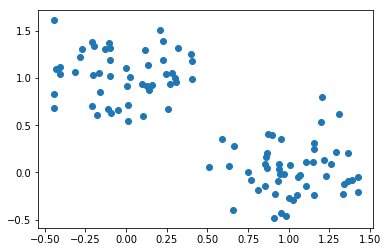

In [5]:
plt.plot(data['c10p1'][:,0], data['c10p1'][:,1], 'o')

plt.show()

In [6]:
mu_x = np.sum(data['c10p1'][:,0]) / data['c10p1'][:,0].size

In [7]:
x = data['c10p1'][:,0] - mu_x

In [8]:
mu_y = np.sum(data['c10p1'][:,1]) / data['c10p1'][:,1].size

In [9]:
y = data['c10p1'][:,1] - mu_y

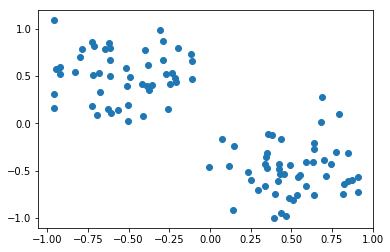

In [10]:
plt.plot(x, y, 'o')

plt.show()

In [106]:
w_pre = np.random.rand(2)
u=np.array([0.0,0.0])
mod = x.size
delta_t = 0.01

In [107]:
w_pre

array([0.28916029, 0.61897553])

In [108]:
for i in range(100000):
    n=np.mod(i,mod)
    u[0]=x[n]
    u[1]=y[n]
    v = np.dot(u,w_pre)
    w = w_pre + delta_t*(v*u-(v**2)*w_pre)
    w_pre = w

In [109]:
w_pre

array([-0.70937641,  0.70502683])

In [110]:
for i in range(100):
    n=np.mod(i,mod)
    u[0]=x[n]
    u[1]=y[n]
    v = np.dot(u,w_pre)
    w = w_pre + delta_t*(v*u-v**2*w)
    w_pre = w

In [111]:
w_pre

array([-0.70937641,  0.70502683])

In [112]:
X = np.zeros((2, 2)) #correlation matrix
for i in range(x.size):
    u[0]=x[n]
    u[1]=y[n]
    X += np.outer(u,u)

In [113]:
X = X/x.size

In [114]:
X

array([[ 0.85001849, -0.48219233],
       [-0.48219233,  0.27353457]])

In [115]:
l,E = np.linalg.eig(X)

In [116]:
l

array([1.12355306e+00, 8.32667268e-16])

In [117]:
E

array([[ 0.86979597,  0.49341156],
       [-0.49341156,  0.86979597]])

In [118]:
np.dot(w_pre,w_pre)

1.0002777276484645

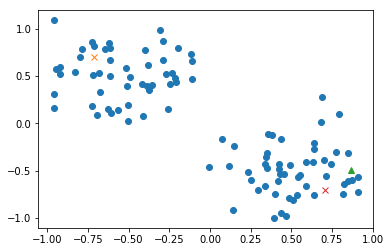

In [121]:
plt.plot(x, y, 'o', w_pre[0], w_pre[1], 'x', E[0,0], E[1,0], '^', 0.70937641, -0.70502683, 'x')
#last one added manually, that is another convergence point
plt.show()